In [ ]:

import pandas as pd
import matplotlib.pyplot as plt



In [ ]:

file_path ='C:/Users/elwady/Downloads/File 2.csv'

titanic_data = pd.read_csv(file_path)
print("First few rows of the dataset:")
print(titanic_data.head())
print("\nBasic information about the dataset:")
titanic_data.info()
print("\nSummary statistics:")
print(titanic_data.describe())



First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Basic information about the dataset:
<class 'pandas.co

In [ ]:
missing_values = titanic_data.isnull().sum()
print("\nMissing values before handling:")
print(missing_values)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)
titanic_data['Cabin'].fillna('Unknown', inplace=True)


print("\nMissing values after handling:")
print(titanic_data.isnull().sum())


Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\elwady\AppData\Local\Temp\ipykernel_3388\1819578265.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
C:\Users\elwady\AppData\Local\Temp\ipykernel_3388\1819578265.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [ ]:
duplicates = titanic_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
titanic_data = titanic_data.drop_duplicates()


print("\nDataset summary after removing duplicates:")
print(titanic_data.info())


Number of duplicate rows: 0

Dataset summary after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [ ]:
if 'Cabin' in titanic_data.columns:
    titanic_data['Cabin_Letter'] = titanic_data['Cabin'].str[0]
else:
    print("Column 'Cabin' does not exist in the dataset.")

In [ ]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked', 'Cabin_Letter'], drop_first=True)

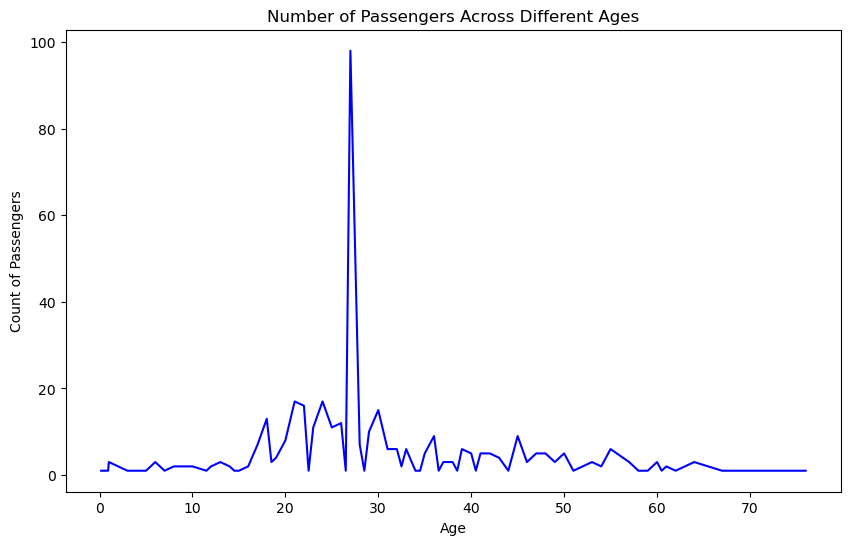

In [ ]:
plt.figure(figsize=(10, 6))
titanic_data['Age'].value_counts().sort_index().plot(kind='line', color='blue')
plt.title('Number of Passengers Across Different Ages')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

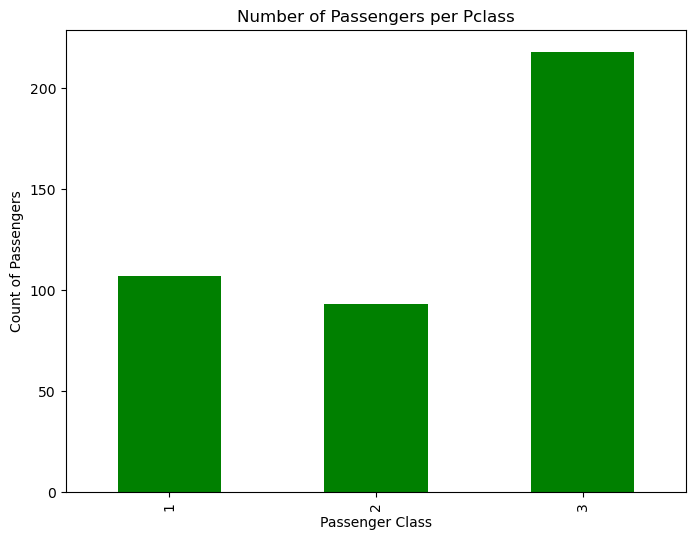

In [ ]:
plt.figure(figsize=(8, 6))
titanic_data['Pclass'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Number of Passengers per Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.show()

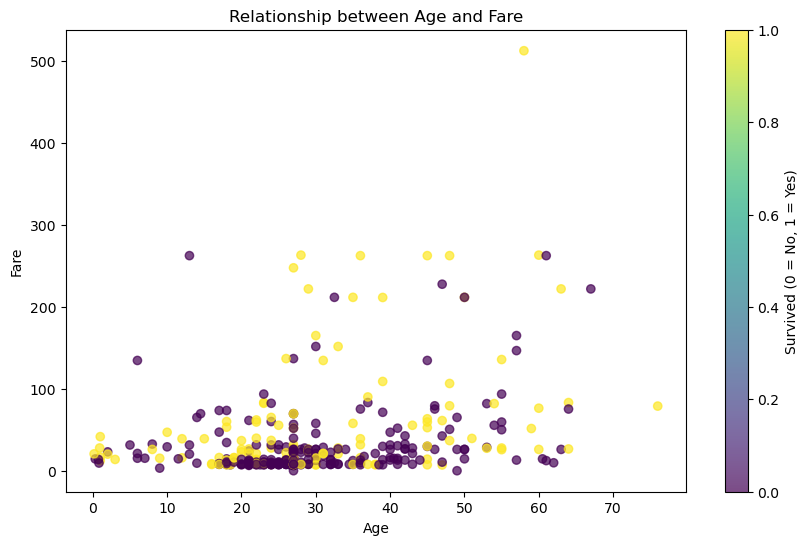

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(titanic_data['Age'], titanic_data['Fare'], c=titanic_data['Survived'], cmap='viridis', alpha=0.7)
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survived (0 = No, 1 = Yes)')
plt.show()

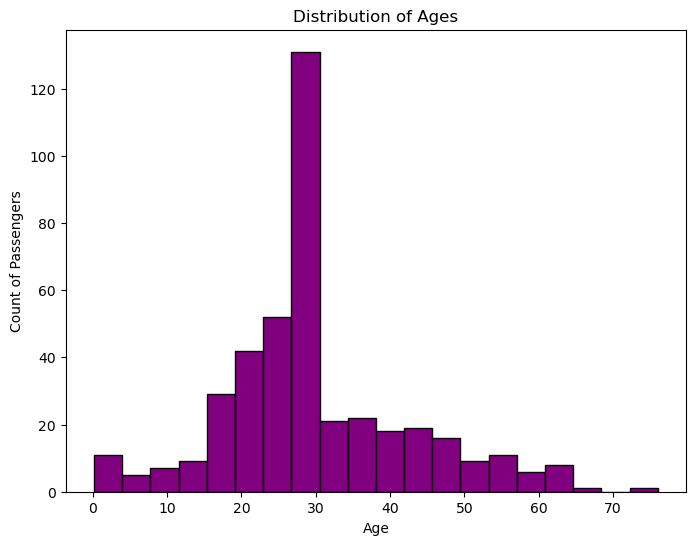

In [ ]:
plt.figure(figsize=(8, 6))
titanic_data['Age'].plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

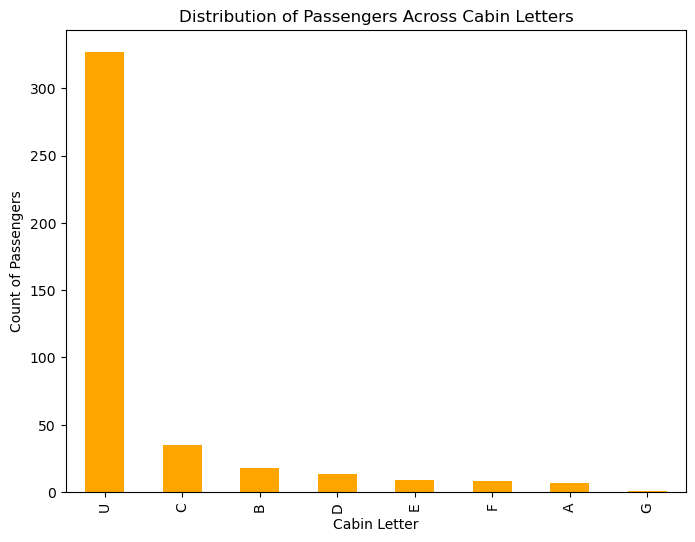

In [ ]:
plt.figure(figsize=(8, 6))
titanic_data['Cabin_Letter'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Passengers Across Cabin Letters')
plt.xlabel('Cabin Letter')
plt.ylabel('Count of Passengers')
plt.show()

In [ ]:
print("\nInsights:")
print("- Most passengers belonged to the third class.")
print("- Missing cabin data was common, and those passengers had varied survival rates.")
print("- Younger passengers appear to have been more numerous, and there are observable trends in survival rates by age and fare.")


Insights:
- Most passengers belonged to the third class.
- Missing cabin data was common, and those passengers had varied survival rates.
- Younger passengers appear to have been more numerous, and there are observable trends in survival rates by age and fare.
